In [1]:
from sqlalchemy import create_engine 
import pandas as pd

In [2]:
DATABASE_TYPE="postgresql"
USERNAME="mutakabbir"
PASSWORD="lightning"
HOST="localhost"
PORT=5432
DATABASE_NAME="postgres"
TABLE_NAME="division_station"

In [3]:
engine = create_engine(f"{DATABASE_TYPE}://{USERNAME}:{PASSWORD}@{HOST}:{PORT}/{DATABASE_NAME}")

In [18]:
division_list_query = f"""select distinct(ds.cid) from {TABLE_NAME} ds"""

distinct_flag_values = lambda flag_name: f"""select distinct(ics."{flag_name}") from ics"""

stations_in_subdivision = lambda feduid: f"""select distinct(ds."climate_ID") from {TABLE_NAME} ds where ds.cid = {feduid}"""

station_data_query = lambda staion_id: f"""select * from ics where ics."ECCC station identifier" in ('{"','".join(map(str, staion_id))}')"""

start_end_date_per_division_query = """
    select 
        yd.cid as fed_id , 
        min(yd.first_yr) as start_yr,
        max(yd.last_yr) as last_yr
    from (
        select ds.cid, im."climate_ID", im.first_yr, im.last_yr
        from division_station ds 
        inner join ics_meta im 
            on im."climate_ID"  = ds."climate_ID") as yd
    group by (yd.cid)
"""

station_count_per_division_query = """
select 
	yd."FEDUID" as fed_id , 
	count(yd."climate_ID") as station_count
from (
	select ds."FEDUID", im."climate_ID", im.first_yr, im.last_yr
	from division_station ds 
	inner join ics_meta im 
		on im."climate_ID"  = ds."climate_ID") as yd
group by (yd."FEDUID") 
"""

In [14]:
division_list = pd.read_sql(division_list_query, con=engine)["cid"].values.tolist()

In [15]:
station_id_list = pd.read_sql(stations_in_subdivision(division_list[25]), con=engine)["climate_ID"].values.tolist()
station_id_list

['1123939', '1128582', '112FN0M', '116FRMN']

In [16]:
ics_dataset = pd.read_sql(station_data_query(station_id_list), con=engine)

In [152]:
print(station_data_query(station_id_list))

select * from ics where ics."ECCC station identifier" in ('4028038','4032322','4028060','4020286','4024714','4036844','402DAF0','4043901','4038412','4024919','4031999')


In [19]:
start_end_year_df = pd.read_sql(start_end_date_per_division_query, con=engine)

Text(0, 0.5, 'Year')

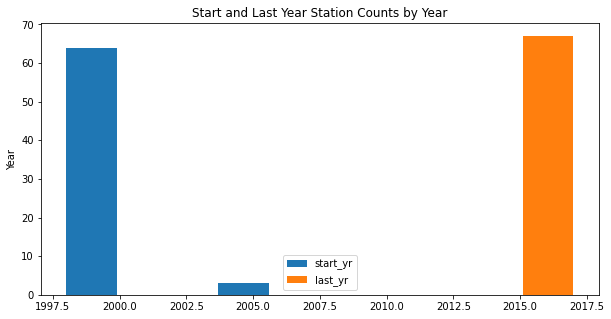

In [20]:
ax = start_end_year_df[['start_yr','last_yr']].rename({
    'start_yr': 'Start Year',
    'last_yr': 'Last Year',
}).plot(kind="hist", figsize=(10,5))

ax.set_title("Start and Last Year Station Counts by Year")
ax.set_ylabel("Year")

In [131]:
station_count_df = pd.read_sql(station_count_per_division_query, con=engine).sort_values('station_count')

<AxesSubplot:xlabel='fed_id'>

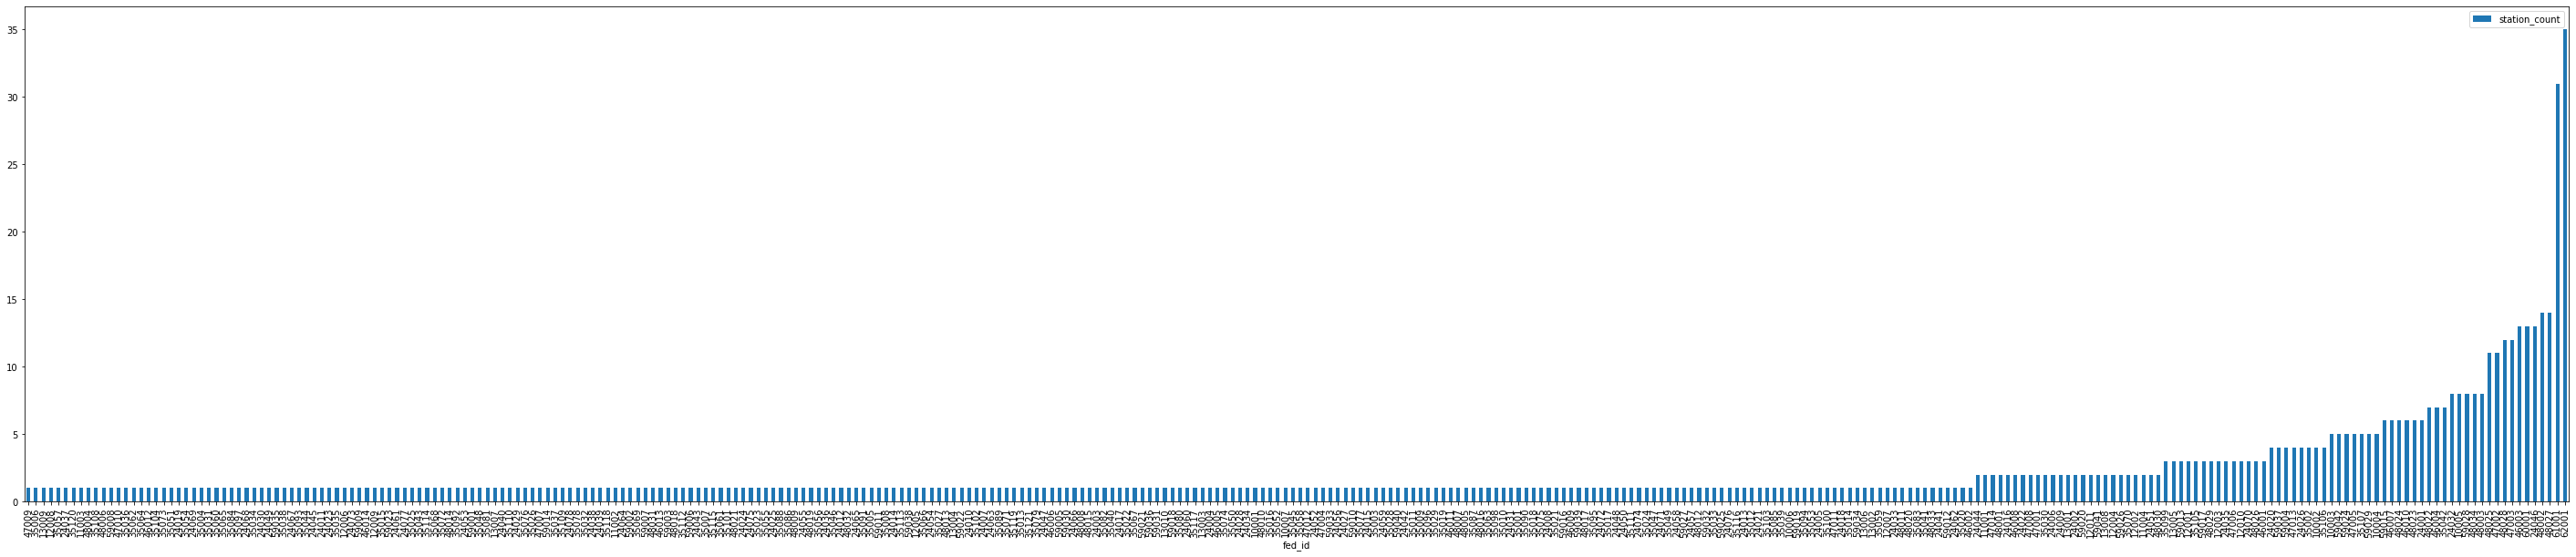

In [132]:
station_count_df.plot(
    x="fed_id", 
    y="station_count", 
    kind='bar',
    # bins=10,
    figsize=(50,10))

In [157]:
# find distinct values for each flag
for id in range(20):
    flag_name = "Flag" if id == 0 else f"Flag.{id}"
    query = distinct_flag_values(flag_name)
    print(flag_name)
    result_df = pd.read_sql(query, con=engine)
    print(result_df) 

Flag
   Flag
0     I
1  None
2     N
3     S
4     E
5     M
Flag.1
  Flag.1
0      Q
1      N
2      S
Flag.2
  Flag.2
0      I
1   None
2      N
3      S
4      E
5      M
Flag.3
  Flag.3
0      Q
1      9
Flag.4
  Flag.4
0      Q
1      9
Flag.5
  Flag.5
0      Q
1      9
Flag.6
  Flag.6
0      9
Flag.7
  Flag.7
0   None
1      E
2      9
Flag.8
  Flag.8
0   None
1      E
2      9
Flag.9
  Flag.9
0   None
1      E
2      9
Flag.10
  Flag.10
0    None
1       E
2       9
Flag.11
  Flag.11
0    None
1       E
2       9
Flag.12
  Flag.12
0    None
1       N
2       E
3       T
Flag.13
  Flag.13
0       N
1    None
2       E
3       T
Flag.14
  Flag.14
0       N
1    None
2       E
3       T
Flag.15
  Flag.15
0       N
1    None
2       E
3       T
Flag.16
  Flag.16
0       N
1    None
2       E
3       T
Flag.17
  Flag.17
0    None
1       E
2       9
Flag.18
  Flag.18
0    None
1       E
2       9
Flag.19
  Flag.19
0       N
1    None
2       E
